<a href="https://colab.research.google.com/github/sgparrot/sgparrot2021Lv1-1/blob/main/Rotation%20%EC%A0%84%EC%B2%98%EB%A6%AC%2C%20%EC%8B%A0%EC%9A%A9%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ImageDataGenerator의 raotation 메소드로 회전시킨 data를 출력해서 어떻게 변하는지 표현해놨습니다.


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Activation, Dense

In [4]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_train.shape)
print("y_train shape: ", x_train.shape)
print("y_test shape: ", x_train.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (60000, 28, 28)
y_train shape:  (60000, 28, 28)
y_test shape:  (60000, 28, 28)


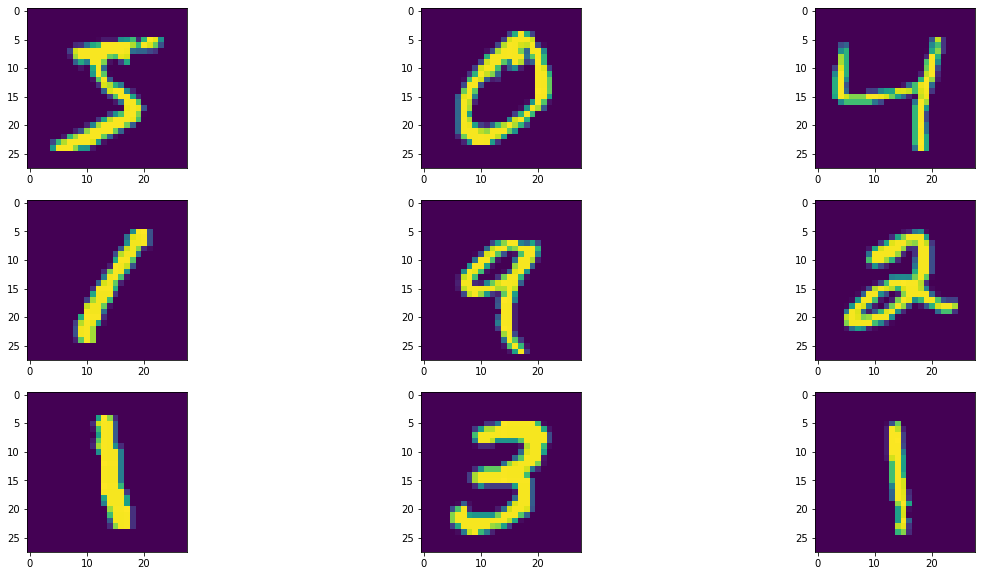

In [6]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()

###imageGenerator import 및 rotation 메소드 설정

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rotation_range_val=40
rotagen = ImageDataGenerator(rotation_range=rotation_range_val)
x_train_rot30=x_train

### rotation 전후 데이터 비교

before rot



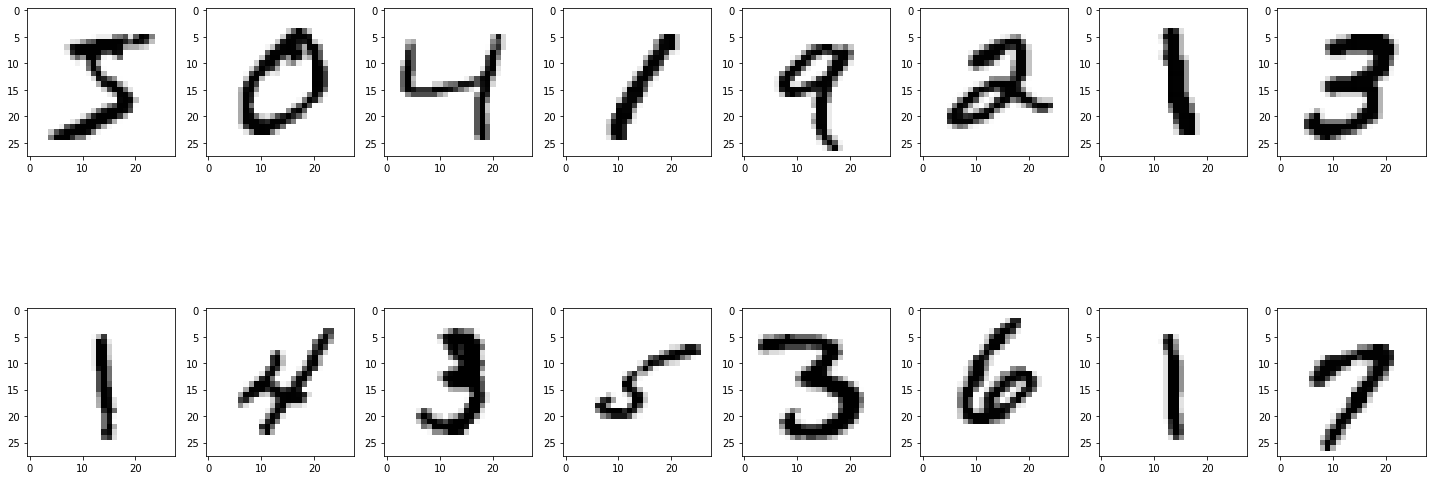

after rot



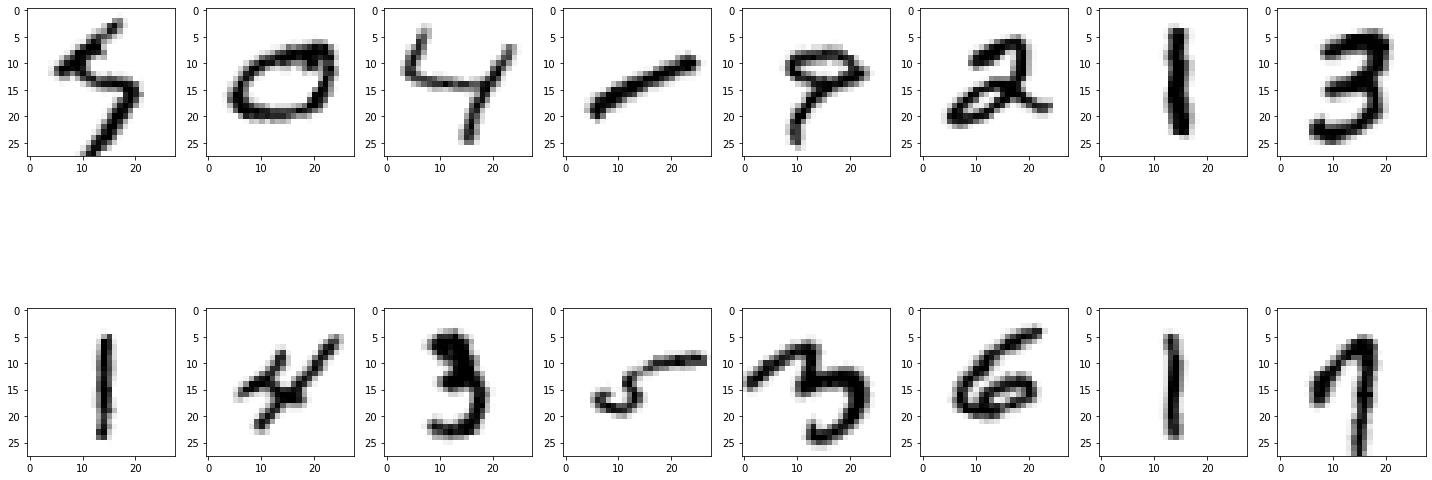

In [13]:
num_row = 2
num_col = 8
num= num_row*num_col

print("before rot\n")
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(20, 10))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
plt.tight_layout()
plt.show()

print("after rot\n")
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(20,10))
for X, Y in rotagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1),y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
     break
plt.tight_layout()
plt.show()

#==============================전처리======================

In [ ]:
num_classes=10

In [1]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

NameError: ignored

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,10)

In [ ]:
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False)

AFTER:



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
mnist=model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.2, verbose=1)

Epoch 1/3
375/375 [==============================] - 22s 58ms/step - loss: 0.7216 - accuracy: 0.7982 - val_loss: 0.2669 - val_accuracy: 0.9252
Epoch 2/3
375/375 [==============================] - 22s 57ms/step - loss: 0.2587 - accuracy: 0.9269 - val_loss: 0.2101 - val_accuracy: 0.9430
Epoch 3/3
375/375 [==============================] - 22s 57ms/step - loss: 0.2184 - accuracy: 0.9381 - val_loss: 0.1805 - val_accuracy: 0.9492
